# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
data=pd.read_csv(r"C:\Users\jenan\Downloads\train_exit.csv")

# DATA UNDERSTANDING & EXPLORATORY DATA ANALYSIS

In [4]:
#To display the first 5 rows of the dataset
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [5]:
#To find the number of rows and columns in the dataset
data.shape

(13994, 30)

In [6]:
#To find the column names
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [7]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [8]:
#To get statistical summary of numerical columns
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


# Visualization of the dataset

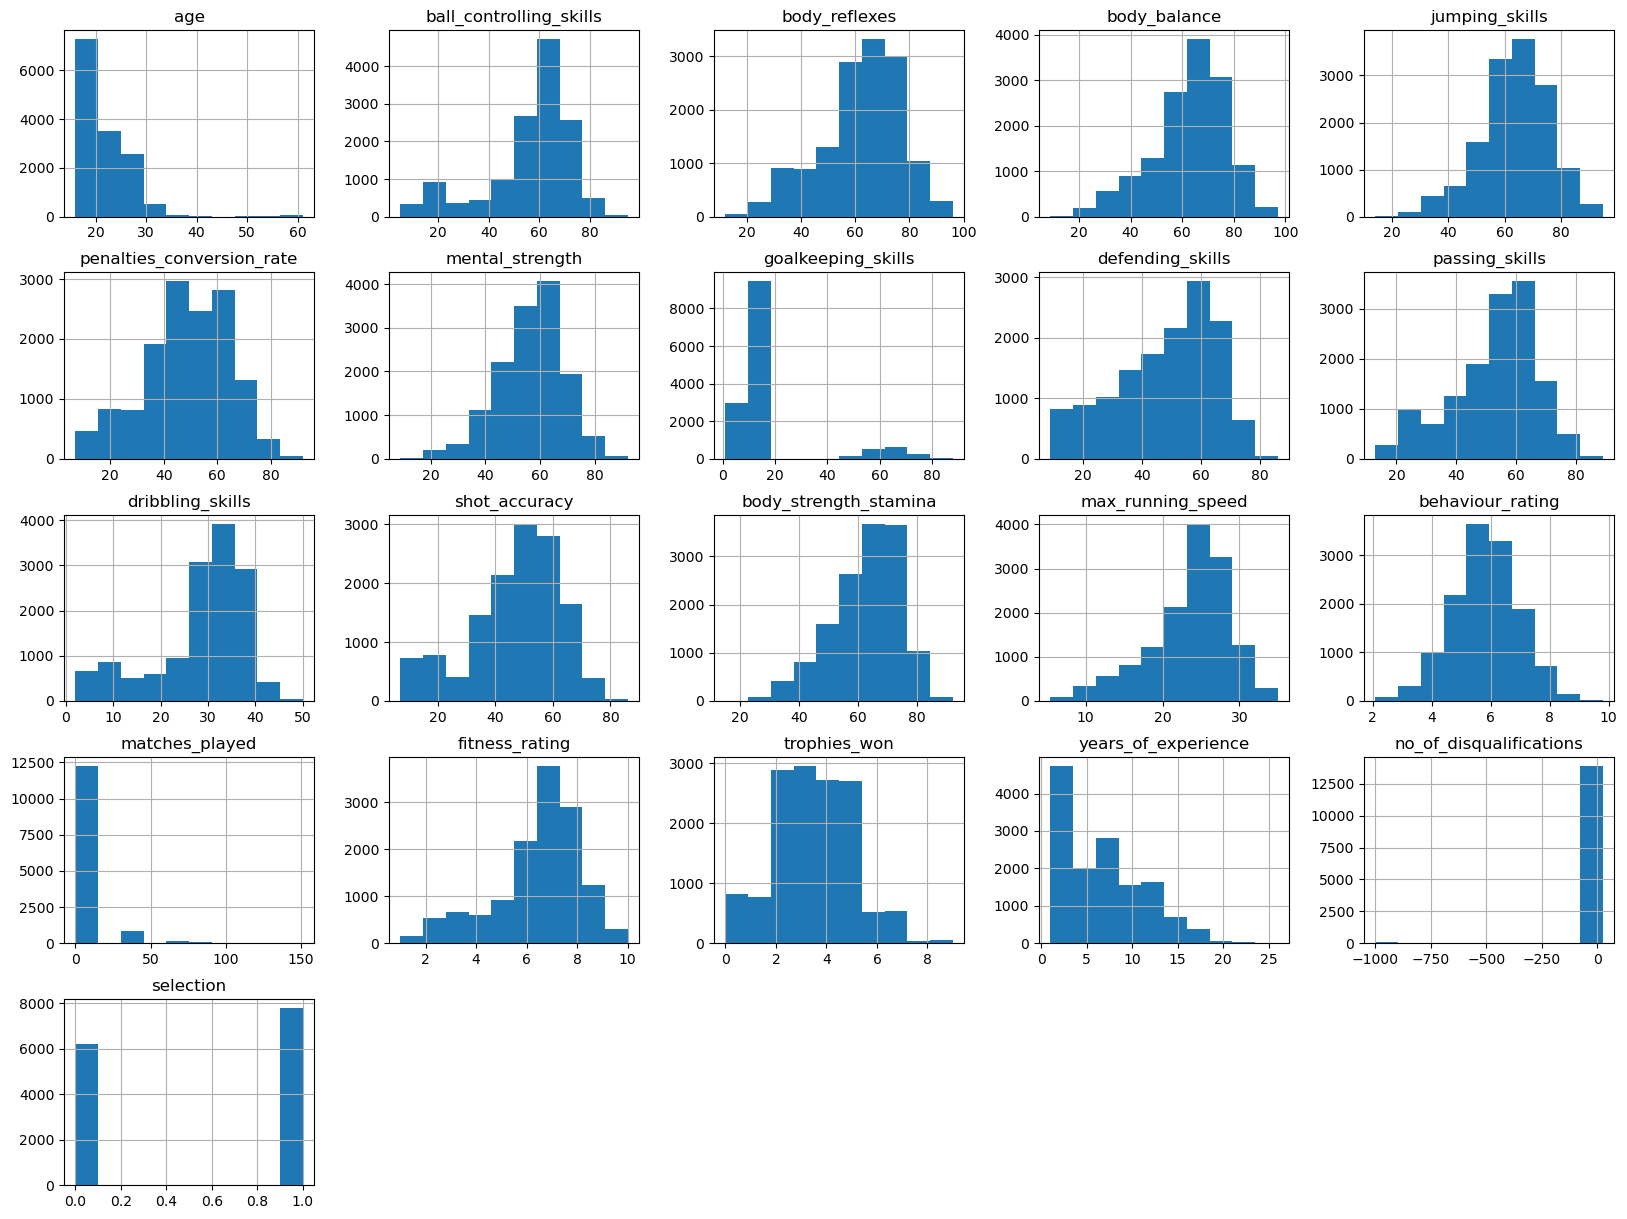

In [10]:
#To plot histogram to analyse the distribution of SL,SW,PL and PW.
data.hist(figsize = (20,15))
plt.show()

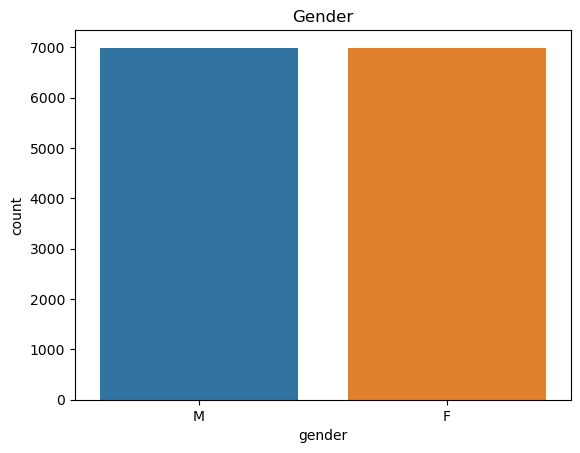

In [11]:
sns.countplot(x='gender',data=data)
plt.title('Gender')
plt.show()

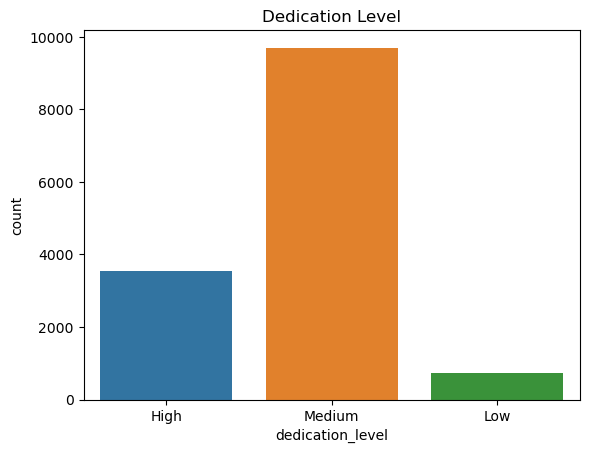

In [14]:
sns.countplot(x='dedication_level',data=data)
plt.title('Dedication Level')
plt.show()

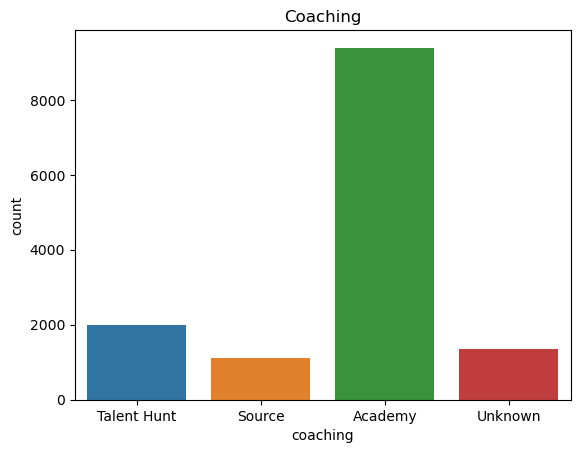

In [16]:
sns.countplot(x='coaching',data=data)
plt.title('Coaching')
plt.show()

# DATA PREPROCESSING

In [19]:
#Finding the number of null values in each column
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [22]:
data['gender']=data['gender'].fillna(data['gender'].mode()[0])

In [32]:
#Changing the data type of weight column and filling the missing values in 'weight'
data['weight'] = data['weight'].str.replace('lbs', '').astype(float)
data['weight']=data['weight'].fillna(data['weight'].mean())

In [51]:
data['ball_controlling_skills']=data['ball_controlling_skills'].fillna(data['ball_controlling_skills'].mean())
data['jumping_skills']=data['jumping_skills'].fillna(data['jumping_skills'].mean())
data['penalties_conversion_rate']=data['penalties_conversion_rate'].fillna(data['penalties_conversion_rate'].mean())
data['mental_strength']=data['mental_strength'].fillna(data['mental_strength'].mean())
data['behaviour_rating']=data['behaviour_rating'].fillna(data['behaviour_rating'].mean())

In [53]:
data['shot_accuracy']=data['shot_accuracy'].fillna(data['shot_accuracy'].mode()[0])
data['strong_foot']=data['strong_foot'].fillna(data['strong_foot'].mode()[0])
data['matches_played']=data['matches_played'].fillna(data['matches_played'].mode()[0])
data['coaching']=data['coaching'].fillna(data['coaching'].mode()[0])
data['years_of_experience']=data['years_of_experience'].fillna(data['years_of_experience'].mode()[0])

In [63]:
data['fitness_rating']=data['fitness_rating'].fillna(method='ffill')

In [70]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

# Outlier Detection

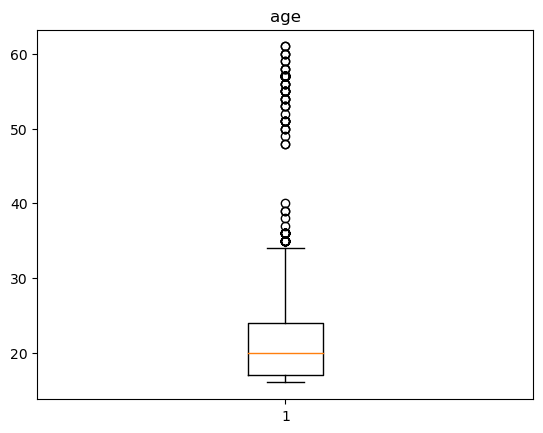

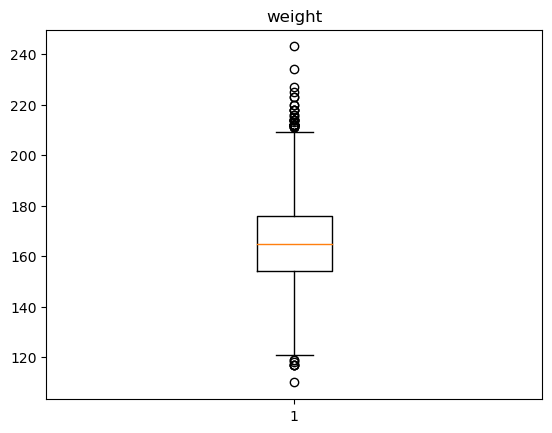

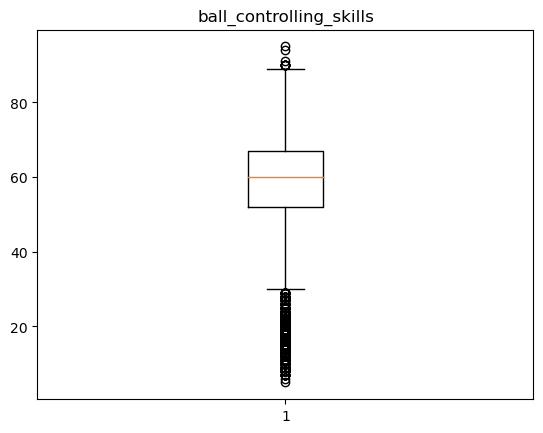

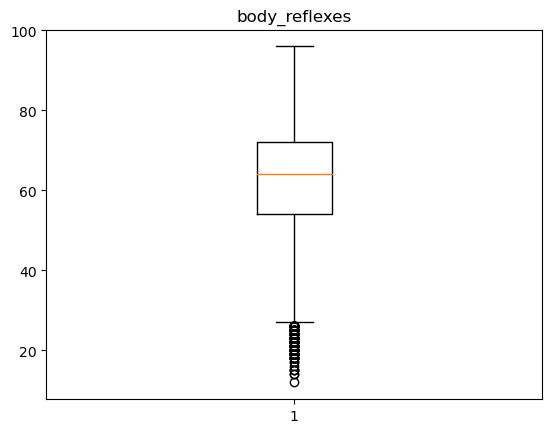

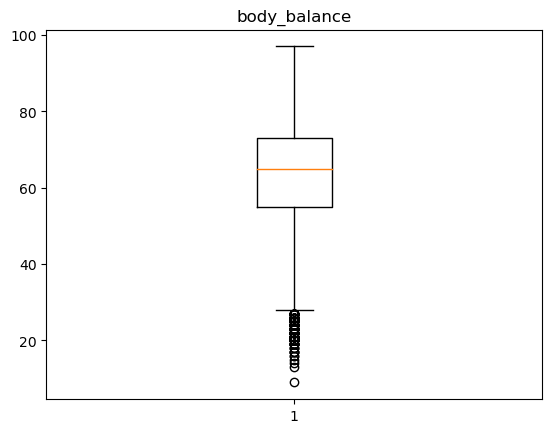

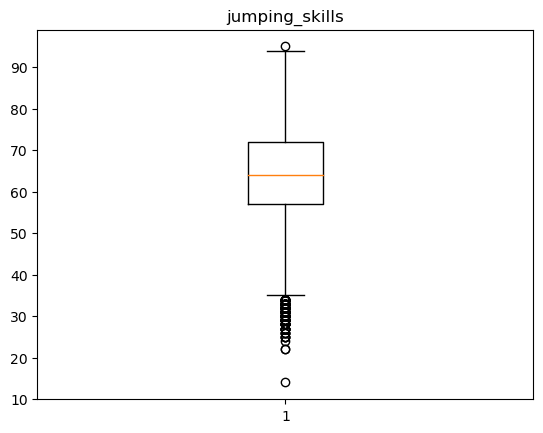

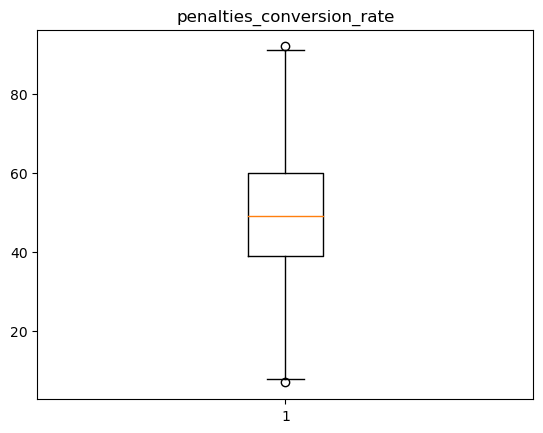

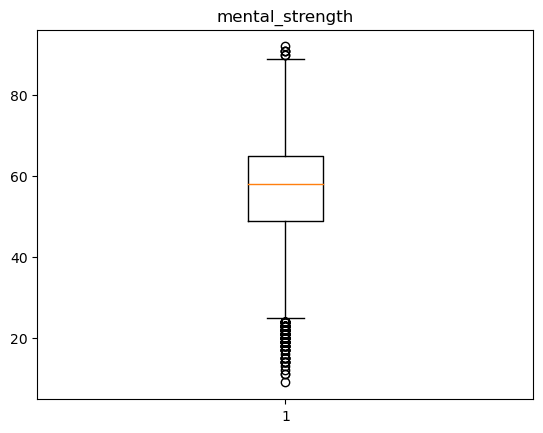

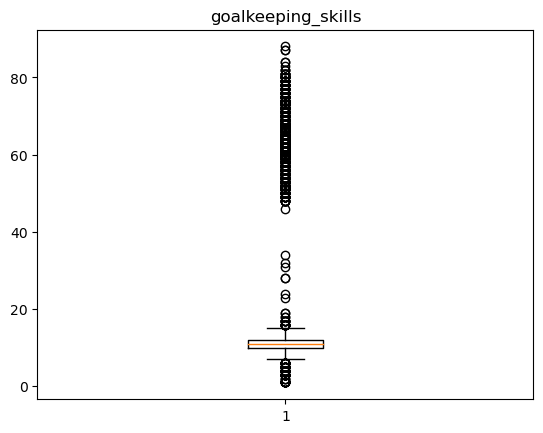

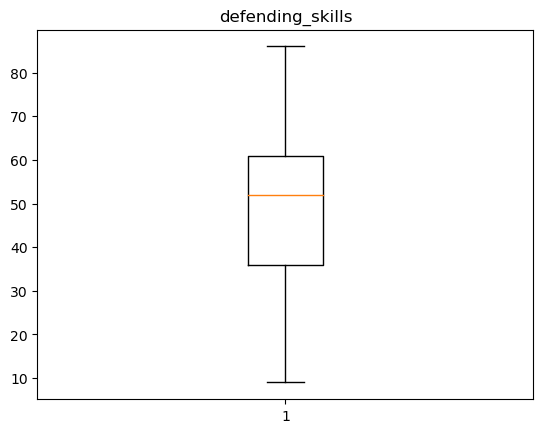

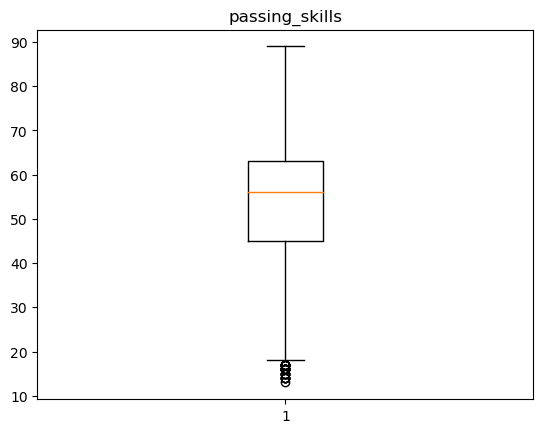

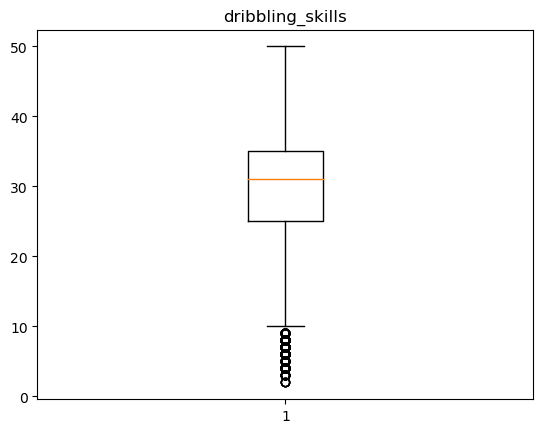

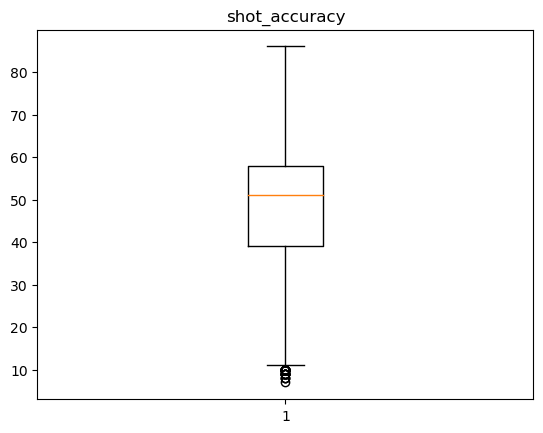

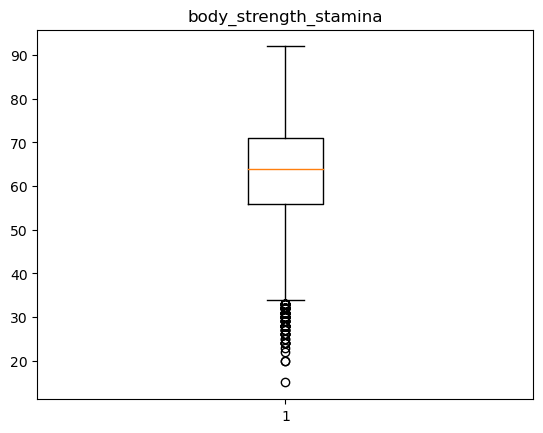

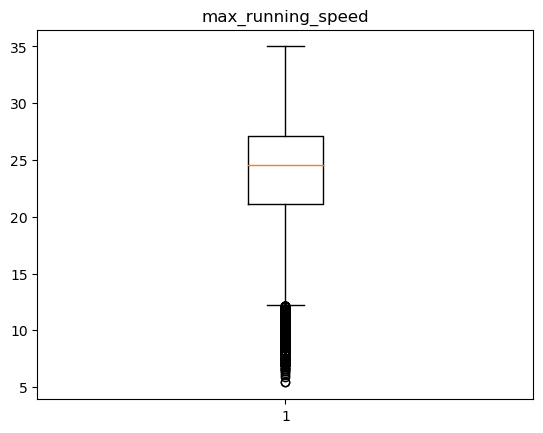

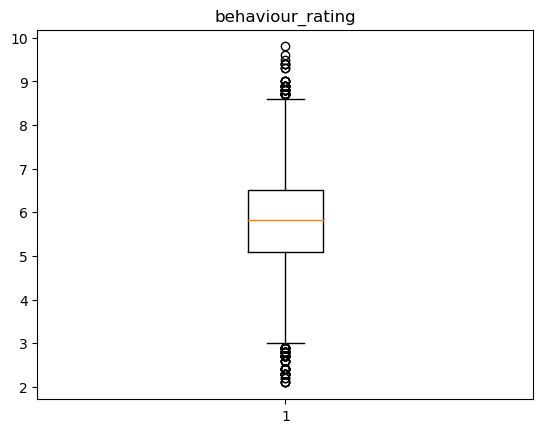

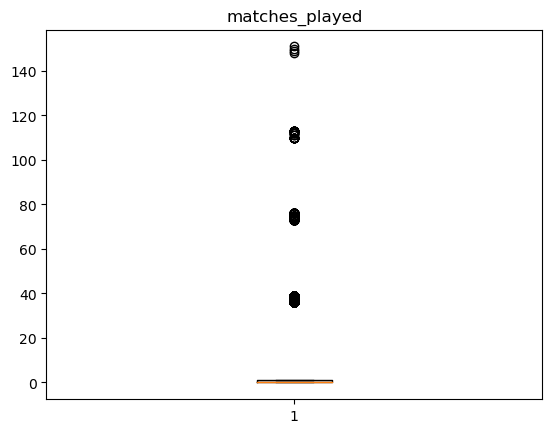

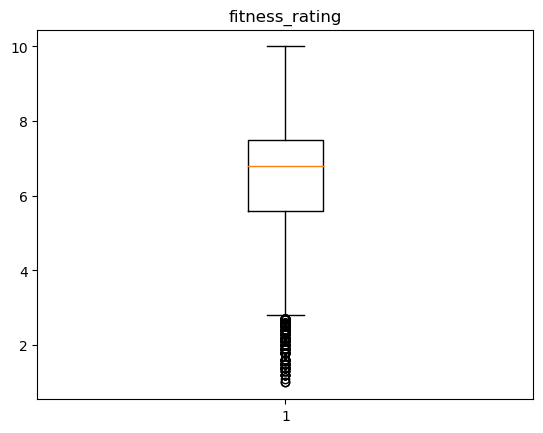

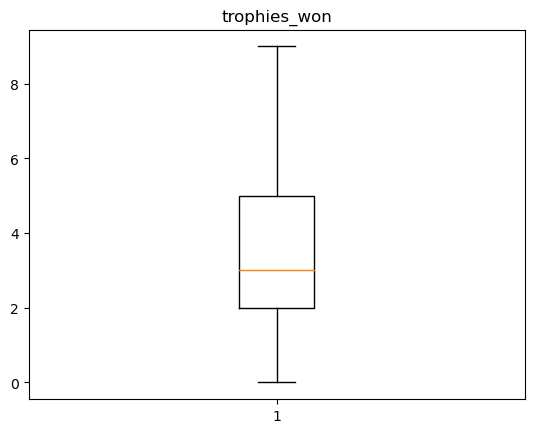

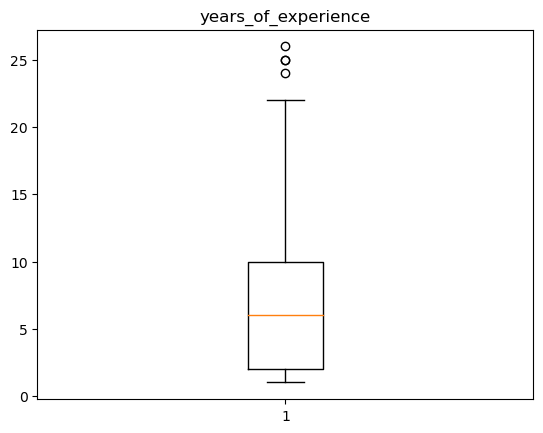

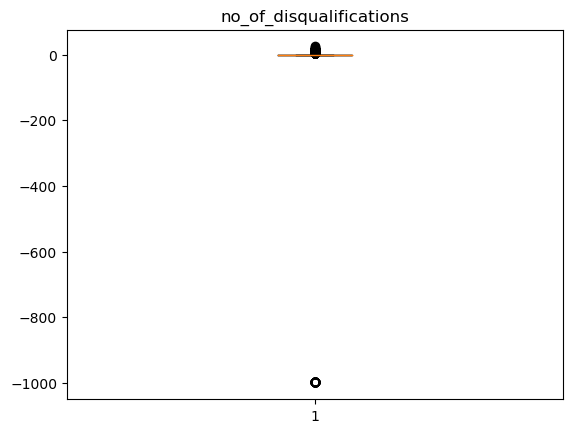

In [73]:
import matplotlib.pyplot as plt
col=['age','weight','ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed','behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won','years_of_experience', 'no_of_disqualifications']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

In [74]:
#To find the outliers
Q1=np.percentile(data['age'],25,method='midpoint')
Q2=np.percentile(data['age'],50,method='midpoint')
Q3=np.percentile(data['age'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['age']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 17.0
Second quartile,Q2 = 20.0
Third quartile,Q3 = 24.0
Inter quartile range = 7.0
Lower limit = 6.5
Upper limit = 34.5
Outliers are  [51, 36, 36, 52, 57, 54, 57, 57, 57, 35, 54, 50, 36, 36, 57, 39, 49, 36, 55, 57, 53, 35, 57, 35, 55, 57, 57, 36, 54, 48, 35, 36, 36, 59, 53, 60, 55, 48, 36, 57, 35, 36, 37, 57, 57, 59, 36, 35, 35, 54, 57, 57, 36, 57, 57, 35, 57, 57, 58, 51, 57, 57, 35, 61, 55, 60, 39, 51, 57, 51, 57, 57, 57, 38, 55, 56, 57, 57, 60, 57, 57, 51, 50, 56, 57, 36, 58, 50, 57, 57, 35, 57, 57, 57, 57, 61, 53, 57, 35, 35, 57, 57, 36, 57, 58, 35, 57, 57, 57, 57, 35, 35, 55, 56, 40, 57, 35, 56, 51]


In [75]:
#To get index of the outliers above the upper limit
age_ind=data['age']>up_lim
data.loc[age_ind].index

Int64Index([   75,   130,   235,   545,   607,   613,   668,   712,   714,
              737,
            ...
            12751, 12829, 12858, 12936, 13020, 13218, 13237, 13312, 13344,
            13954],
           dtype='int64', length=119)

In [79]:
data.drop(data.loc[age_ind].index,inplace=True)

In [80]:
#To find the outliers
Q1=np.percentile(data['weight'],25,method='midpoint')
Q2=np.percentile(data['weight'],50,method='midpoint')
Q3=np.percentile(data['weight'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['weight']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 154.0
Second quartile,Q2 = 165.0
Third quartile,Q3 = 176.0
Inter quartile range = 22.0
Lower limit = 121.0
Upper limit = 209.0
Outliers are  [212.0, 212.0, 211.0, 212.0, 212.0, 216.0, 214.0, 214.0, 117.0, 214.0, 212.0, 212.0, 225.0, 212.0, 220.0, 214.0, 212.0, 110.0, 223.0, 211.0, 212.0, 212.0, 211.0, 218.0, 117.0, 216.0, 218.0, 118.0, 214.0, 119.0, 218.0, 119.0, 211.0, 212.0, 117.0, 117.0, 220.0, 227.0, 212.0, 212.0, 243.0, 234.0, 218.0, 213.0, 212.0, 215.0, 223.0]


In [81]:
#To get index of the outliers below the lower limit
weight_ind_1=data['weight']<low_lim
data.loc[weight_ind_1].index

Int64Index([2851, 4731, 6370, 7610, 8212, 8515, 10640, 10868], dtype='int64')

In [82]:
data.drop([2851, 4731, 6370, 7610, 8212, 8515, 10640, 10868],inplace=True)

In [83]:
#To get index of the outliers above the upper limit
weight_ind_2=data['weight']>up_lim
data.loc[weight_ind_2].index

Int64Index([  446,   647,  1364,  1945,  2059,  2115,  2798,  2849,  3240,
             3283,  3316,  3601,  3606,  3961,  4217,  4676,  5323,  5489,
             5849,  5928,  6141,  6181,  7306,  7341,  7961,  8284, 10498,
            10606, 11058, 11725, 11744, 11786, 12043, 12272, 12608, 12749,
            12866, 13617, 13854],
           dtype='int64')

In [84]:
data.drop(data.loc[weight_ind_2].index,inplace=True)

In [85]:
#To find the outliers
Q1=np.percentile(data['ball_controlling_skills'],25,method='midpoint')
Q2=np.percentile(data['ball_controlling_skills'],50,method='midpoint')
Q3=np.percentile(data['ball_controlling_skills'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['ball_controlling_skills']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 52.0
Second quartile,Q2 = 60.0
Third quartile,Q3 = 67.0
Inter quartile range = 15.0
Lower limit = 29.5
Upper limit = 89.5
Outliers are  [16.0, 29.0, 17.0, 19.0, 20.0, 18.0, 25.0, 17.0, 9.0, 17.0, 10.0, 24.0, 29.0, 17.0, 20.0, 21.0, 15.0, 21.0, 13.0, 29.0, 18.0, 25.0, 13.0, 16.0, 11.0, 10.0, 13.0, 10.0, 10.0, 20.0, 25.0, 22.0, 23.0, 10.0, 19.0, 11.0, 18.0, 12.0, 10.0, 9.0, 12.0, 11.0, 13.0, 8.0, 29.0, 14.0, 21.0, 20.0, 8.0, 15.0, 29.0, 18.0, 20.0, 21.0, 15.0, 27.0, 22.0, 22.0, 19.0, 14.0, 25.0, 16.0, 10.0, 20.0, 14.0, 11.0, 17.0, 28.0, 24.0, 10.0, 22.0, 21.0, 9.0, 16.0, 18.0, 14.0, 18.0, 12.0, 21.0, 20.0, 18.0, 17.0, 25.0, 91.0, 18.0, 17.0, 16.0, 16.0, 18.0, 22.0, 22.0, 17.0, 23.0, 16.0, 13.0, 16.0, 22.0, 15.0, 20.0, 10.0, 22.0, 19.0, 20.0, 14.0, 17.0, 17.0, 10.0, 16.0, 19.0, 17.0, 17.0, 20.0, 15.0, 11.0, 17.0, 20.0, 13.0, 22.0, 13.0, 21.0, 17.0, 25.0, 20.0, 16.0, 12.0, 15.0, 15.0, 12.0, 90.0, 14.0, 8.0, 13.0, 12.0, 19.0, 11.0, 15.0, 17.0, 13.0, 16.0, 23.0, 29.0, 15.

In [86]:
#To get index of the outliers below the lower limit
ball_ind_1=data['ball_controlling_skills']<low_lim
data.loc[ball_ind_1].index

Int64Index([   32,    42,    48,    51,    53,    58,    79,    86,   122,
              128,
            ...
            13925, 13927, 13933, 13945, 13946, 13947, 13952, 13964, 13969,
            13975],
           dtype='int64', length=1502)

In [87]:
data.drop(data.loc[ball_ind_1].index,inplace=True)

In [88]:
#To get index of the outliers below the lower limit
ball_ind_2=data['ball_controlling_skills']>up_lim
data.loc[ball_ind_2].index

Int64Index([793, 1203, 1728, 2820, 3394, 3784, 5686, 6113, 9861, 10465, 13112], dtype='int64')

In [89]:
data.drop(data.loc[ball_ind_2].index,inplace=True)

In [90]:
#To find the outliers
Q1=np.percentile(data['body_reflexes'],25,method='midpoint')
Q2=np.percentile(data['body_reflexes'],50,method='midpoint')
Q3=np.percentile(data['body_reflexes'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['body_reflexes']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 57.0
Second quartile,Q2 = 66.0
Third quartile,Q3 = 73.0
Inter quartile range = 16.0
Lower limit = 33.0
Upper limit = 97.0
Outliers are  [31.0, 26.0, 31.0, 32.0, 31.0, 31.0, 32.0, 30.0, 29.0, 30.0, 29.0, 28.0, 23.0, 29.0, 32.0, 31.0, 29.0, 31.0, 28.0, 30.0, 31.0, 32.0, 32.0, 32.0, 31.0, 30.0, 31.0, 32.0, 27.0, 30.0, 32.0, 28.0, 29.0, 27.0, 29.0, 32.0, 30.0, 31.0, 30.0, 28.0, 32.0, 19.0, 27.0, 32.0, 28.0, 31.0, 30.0, 28.0, 28.0, 30.0, 30.0, 30.0, 28.0, 29.0, 32.0, 30.0, 27.0, 29.0, 32.0, 28.0, 29.0, 30.0, 29.0, 31.0, 23.0, 32.0, 30.0, 30.0, 31.0, 23.0, 28.0, 29.0, 30.0, 32.0, 29.0, 31.0, 30.0, 25.0, 31.0, 29.0, 32.0, 32.0, 28.0, 32.0, 32.0, 29.0, 27.0, 29.0, 32.0, 31.0, 30.0, 32.0, 28.0, 29.0, 30.0, 32.0, 32.0, 32.0, 29.0, 31.0, 29.0, 30.0, 31.0, 31.0, 31.0, 30.0, 31.0, 31.0, 32.0, 26.0, 30.0, 29.0, 31.0, 30.0, 32.0, 28.0, 31.0, 30.0, 32.0, 31.0, 32.0, 30.0, 26.0, 29.0, 30.0, 26.0, 32.0, 31.0, 30.0, 32.0, 32.0, 31.0, 20.0, 20.0, 32.0, 29.0, 24.0, 30.0, 30.0, 31.0, 26.

In [91]:
#To get index of the outliers below the lower limit
body_ind_1=data['body_reflexes']<low_lim
data.loc[body_ind_1].index

Int64Index([   36,   113,   141,   189,   211,   268,   291,   314,   357,
              437,
            ...
            13184, 13267, 13296, 13444, 13518, 13584, 13601, 13724, 13770,
            13863],
           dtype='int64', length=184)

In [92]:
data.drop(data.loc[body_ind_1].index,inplace=True)

In [94]:
#To find the outliers
Q1=np.percentile(data['body_balance'],25,method='midpoint')
Q2=np.percentile(data['body_balance'],50,method='midpoint')
Q3=np.percentile(data['body_balance'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['body_balance']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 59.0
Second quartile,Q2 = 67.0
Third quartile,Q3 = 74.0
Inter quartile range = 15.0
Lower limit = 36.5
Upper limit = 96.5
Outliers are  [31.0, 32.0, 31.0, 34.0, 31.0, 33.0, 36.0, 32.0, 35.0, 30.0, 36.0, 29.0, 33.0, 34.0, 35.0, 32.0, 36.0, 31.0, 34.0, 33.0, 30.0, 35.0, 31.0, 27.0, 28.0, 33.0, 33.0, 31.0, 32.0, 36.0, 36.0, 30.0, 36.0, 34.0, 34.0, 27.0, 32.0, 33.0, 32.0, 36.0, 33.0, 34.0, 30.0, 29.0, 32.0, 34.0, 26.0, 30.0, 33.0, 36.0, 36.0, 34.0, 22.0, 28.0, 35.0, 34.0, 34.0, 36.0, 34.0, 31.0, 36.0, 33.0, 32.0, 34.0, 32.0, 30.0, 34.0, 35.0, 34.0, 32.0, 33.0, 23.0, 34.0, 29.0, 34.0, 35.0, 36.0, 31.0, 34.0, 35.0, 34.0, 33.0, 36.0, 31.0, 28.0, 32.0, 31.0, 33.0, 34.0, 33.0, 29.0, 36.0, 30.0, 34.0, 31.0, 33.0, 35.0, 23.0, 23.0, 32.0, 34.0, 29.0, 36.0, 32.0, 36.0, 34.0, 30.0, 31.0, 31.0, 25.0, 32.0, 33.0, 32.0, 33.0, 32.0, 34.0, 27.0, 36.0, 35.0, 33.0, 31.0, 35.0, 31.0, 30.0, 36.0, 31.0, 34.0, 28.0, 29.0, 35.0, 33.0, 34.0, 32.0, 31.0, 34.0, 25.0, 36.0, 25.0, 29.0, 34.0, 33.

In [95]:
#To get index of the outliers below the lower limit
bal_ind_1=data['body_balance']<low_lim
data.loc[bal_ind_1].index

Int64Index([   49,   143,   173,   275,   281,   333,   395,   432,   454,
              475,
            ...
            13236, 13298, 13447, 13479, 13574, 13599, 13609, 13677, 13712,
            13735],
           dtype='int64', length=223)

In [96]:
data.drop(data.loc[bal_ind_1].index,inplace=True)

In [98]:
#To find the outliers
Q1=np.percentile(data['jumping_skills'],25,method='midpoint')
Q2=np.percentile(data['jumping_skills'],50,method='midpoint')
Q3=np.percentile(data['jumping_skills'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['jumping_skills']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 58.0
Second quartile,Q2 = 65.0
Third quartile,Q3 = 72.0
Inter quartile range = 14.0
Lower limit = 37.0
Upper limit = 93.0
Outliers are  [32.0, 30.0, 33.0, 35.0, 34.0, 30.0, 30.0, 34.0, 31.0, 36.0, 35.0, 36.0, 32.0, 34.0, 32.0, 32.0, 32.0, 30.0, 36.0, 29.0, 32.0, 34.0, 34.0, 31.0, 36.0, 30.0, 35.0, 34.0, 31.0, 34.0, 32.0, 29.0, 29.0, 32.0, 35.0, 30.0, 33.0, 36.0, 36.0, 36.0, 33.0, 33.0, 36.0, 33.0, 32.0, 94.0, 30.0, 36.0, 35.0, 33.0, 28.0, 32.0, 36.0, 34.0, 30.0, 31.0, 32.0, 33.0, 33.0, 36.0, 35.0, 33.0, 30.0, 36.0, 28.0, 32.0, 33.0, 31.0, 32.0, 34.0, 31.0, 34.0, 36.0, 31.0, 27.0, 34.0, 33.0, 32.0, 34.0, 32.0, 35.0, 32.0, 31.0, 36.0, 33.0, 29.0, 36.0, 31.0, 34.0, 36.0, 31.0, 31.0, 36.0, 27.0, 29.0, 32.0, 34.0, 94.0, 30.0, 26.0, 35.0, 36.0, 33.0, 36.0, 29.0, 33.0, 36.0, 34.0, 32.0, 31.0, 36.0, 32.0, 32.0, 34.0, 32.0, 31.0, 32.0, 32.0, 31.0, 30.0, 33.0, 36.0, 33.0, 31.0, 34.0, 32.0, 36.0, 34.0, 36.0, 34.0, 36.0, 35.0, 32.0, 94.0, 36.0, 36.0, 33.0, 30.0, 94.0, 34.0, 33.

In [99]:
#To get index of the outliers below the lower limit
jump_ind_1=data['jumping_skills']<low_lim
data.loc[jump_ind_1].index

Int64Index([   21,    80,   106,   120,   148,   243,   304,   307,   390,
              422,
            ...
            13338, 13442, 13469, 13549, 13612, 13614, 13655, 13726, 13787,
            13798],
           dtype='int64', length=220)

In [100]:
data.drop(data.loc[jump_ind_1].index,inplace=True)

In [101]:
jump_ind_2=data['jumping_skills']>up_lim
data.loc[jump_ind_2].index

Int64Index([2908, 6383, 8420, 8548, 9459], dtype='int64')

In [102]:
data.drop(data.loc[jump_ind_2].index,inplace=True)

In [107]:
#To find the outliers
Q1=np.percentile(data['penalties_conversion_rate'],25,method='midpoint')
Q2=np.percentile(data['penalties_conversion_rate'],50,method='midpoint')
Q3=np.percentile(data['penalties_conversion_rate'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['penalties_conversion_rate']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 43.0
Second quartile,Q2 = 52.0
Third quartile,Q3 = 62.0
Inter quartile range = 19.0
Lower limit = 14.5
Upper limit = 90.5
Outliers are  [91.0, 13.0, 12.0, 11.0, 12.0, 10.0, 11.0, 14.0, 13.0, 11.0, 92.0, 11.0, 14.0, 13.0, 12.0, 12.0, 14.0, 12.0]


In [108]:
#To get index of the outliers below the lower limit
penal_ind_1=data['penalties_conversion_rate']<low_lim
data.loc[penal_ind_1].index

Int64Index([  993,  1021,  1302,  2884,  3198,  4420,  5711,  6572,  7157,
             9272,  9625, 12399, 12719, 12820, 13006, 13113],
           dtype='int64')

In [109]:
data.drop(data.loc[penal_ind_1].index,inplace=True)

In [110]:
penal_ind_2=data['penalties_conversion_rate']>up_lim
data.loc[penal_ind_2].index

Int64Index([886, 7343], dtype='int64')

In [111]:
data.drop([886, 7343],inplace=True)

In [112]:
#To find the outliers
Q1=np.percentile(data['mental_strength'],25,method='midpoint')
Q2=np.percentile(data['mental_strength'],50,method='midpoint')
Q3=np.percentile(data['mental_strength'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['mental_strength']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 52.0
Second quartile,Q2 = 59.0
Third quartile,Q3 = 66.0
Inter quartile range = 14.0
Lower limit = 31.0
Upper limit = 87.0
Outliers are  [27.0, 90.0, 30.0, 30.0, 18.0, 88.0, 88.0, 29.0, 88.0, 30.0, 29.0, 30.0, 28.0, 92.0, 25.0, 22.0, 29.0, 88.0, 89.0, 27.0, 88.0, 29.0]


In [113]:
#To get index of the outliers below the lower limit
ms_ind_1=data['mental_strength']<low_lim
data.loc[ms_ind_1].index

Int64Index([  294,   947,  1050,  3323,  3967,  5220,  5612,  5729,  6626,
             7383,  8262, 10855, 13224, 13811],
           dtype='int64')

In [114]:
data.drop(data.loc[ms_ind_1].index,inplace=True)

In [115]:
ms_ind_2=data['mental_strength']>up_lim
data.loc[ms_ind_2].index

Int64Index([663, 3494, 3576, 4297, 6991, 11697, 12744, 13773], dtype='int64')

In [116]:
data.drop(data.loc[ms_ind_2].index,inplace=True)

In [117]:
#To find the outliers
Q1=np.percentile(data['goalkeeping_skills'],25,method='midpoint')
Q2=np.percentile(data['goalkeeping_skills'],50,method='midpoint')
Q3=np.percentile(data['goalkeeping_skills'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['goalkeeping_skills']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 10.0
Second quartile,Q2 = 11.0
Third quartile,Q3 = 12.0
Inter quartile range = 2.0
Lower limit = 7.0
Upper limit = 15.0
Outliers are  [3.0, 3.0, 16.0, 4.0, 5.0, 63.0, 3.0, 5.0, 79.0, 61.0, 59.0, 16.0, 4.0, 73.0, 5.0, 5.0, 16.0, 69.0, 6.0, 4.0, 1.0, 4.0, 73.0, 4.0, 79.0, 71.0, 69.0, 1.0, 6.0, 1.0, 69.0, 59.0, 6.0, 60.0, 68.0, 4.0, 4.0, 1.0, 24.0, 4.0, 5.0, 72.0, 4.0, 32.0, 6.0, 58.0, 78.0, 5.0, 6.0, 5.0, 80.0, 79.0, 4.0, 2.0, 1.0, 4.0, 74.0, 80.0, 1.0, 6.0, 4.0, 58.0, 1.0, 4.0, 16.0, 58.0, 70.0, 1.0, 65.0, 61.0, 1.0, 67.0, 6.0, 66.0, 28.0, 67.0, 17.0, 50.0, 62.0, 19.0, 3.0, 34.0, 5.0, 16.0, 68.0, 6.0, 5.0, 75.0, 19.0, 78.0, 16.0, 60.0, 63.0, 5.0, 83.0, 3.0, 5.0, 1.0, 65.0, 55.0, 6.0, 67.0, 75.0, 79.0, 62.0, 5.0, 17.0, 5.0, 4.0, 74.0, 77.0, 1.0, 61.0, 1.0, 61.0, 64.0, 5.0, 4.0, 4.0, 3.0, 17.0, 3.0, 66.0, 16.0, 4.0, 5.0, 60.0, 4.0, 4.0, 72.0, 16.0, 4.0, 55.0, 3.0, 5.0, 70.0, 67.0, 71.0, 66.0, 68.0, 69.0, 75.0, 5.0, 2.0, 72.0, 4.0, 23.0, 4.0, 67.0, 6.0, 18.0, 3.0, 16.0,

In [118]:
goal_ind_1=data['goalkeeping_skills']<low_lim
data.loc[goal_ind_1].index

Int64Index([    3,    61,   285,   290,   392,   469,   671,   717,   730,
             1384,  1403,  1420,  1786,  1847,  2063,  2065,  2070,  2505,
             2593,  2595,  2653,  2711,  2716,  2924,  3217,  3500,  3641,
             3758,  3991,  4063,  4094,  4377,  4493,  4629,  4762,  4863,
             4986,  5333,  5751,  5836,  6454,  6705,  6928,  6974,  7262,
             7642,  7799,  7873,  8463,  8862,  9220,  9273,  9432,  9553,
             9952,  9969, 10232, 10397, 10487, 10724, 10780, 11112, 11335,
            11577, 11768, 11991, 12700, 12706, 12838, 12935, 12947, 12989,
            13201, 13415, 13422, 13522, 13544, 13575, 13826, 13895, 13993],
           dtype='int64')

In [119]:
data.drop(data.loc[goal_ind_1].index,inplace=True)

In [120]:
goal_ind_2=data['goalkeeping_skills']>up_lim
data.loc[goal_ind_2].index

Int64Index([  253,   340,   513,   581,   585,   599,   711,   849,  1219,
             1804,  1859,  1965,  2056,  2210,  2318,  2536,  2589,  2680,
             2752,  3117,  3266,  3439,  3835,  3943,  4398,  4405,  4835,
             5069,  5078,  5107,  5447,  5733,  5766,  6026,  6078,  6145,
             6154,  6218,  6237,  6432,  6601,  6790,  6825,  7001,  7056,
             7094,  7098,  7211,  7213,  7289,  7954,  8030,  8557,  8585,
             8719,  8744,  9111,  9330,  9385,  9465,  9893,  9936, 10412,
            10562, 10674, 10797, 11377, 11509, 11702, 12023, 12066, 12157,
            12242, 12328, 12479, 12560, 12721, 12899, 12941, 12958, 13060,
            13097, 13381, 13520, 13538, 13630, 13632, 13753, 13886],
           dtype='int64')

In [121]:
data.drop(data.loc[goal_ind_2].index,inplace=True)

In [122]:
#To find the outliers
Q1=np.percentile(data['passing_skills'],25,method='midpoint')
Q2=np.percentile(data['passing_skills'],50,method='midpoint')
Q3=np.percentile(data['passing_skills'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['passing_skills']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 50.0
Second quartile,Q2 = 58.0
Third quartile,Q3 = 64.0
Inter quartile range = 14.0
Lower limit = 29.0
Upper limit = 85.0
Outliers are  [27.0, 27.0, 88.0, 28.0, 28.0, 28.0, 26.0, 28.0, 28.0, 86.0, 26.0, 28.0, 26.0, 28.0, 88.0, 28.0, 26.0, 86.0, 27.0, 27.0, 26.0, 28.0, 27.0, 24.0, 28.0, 28.0, 28.0, 26.0, 87.0, 28.0, 26.0, 27.0, 28.0, 28.0, 27.0, 28.0, 87.0, 27.0, 25.0, 28.0, 27.0, 28.0]


In [123]:
pass_ind_1=data['passing_skills']<low_lim
data.loc[pass_ind_1].index

Int64Index([  138,   593,  2800,  2883,  3090,  3180,  4012,  4068,  4379,
             4448,  4836,  5722,  6443,  6747,  6836,  7143,  7260,  7394,
             7449,  7537,  9126,  9517, 10041, 10407, 10682, 10969, 10971,
            11245, 11427, 11582, 11760, 12476, 12609, 12959, 13348, 13462],
           dtype='int64')

In [124]:
data.drop(data.loc[pass_ind_1].index,inplace=True)

In [125]:
#To find the outliers
Q1=np.percentile(data['dribbling_skills'],25,method='midpoint')
Q2=np.percentile(data['dribbling_skills'],50,method='midpoint')
Q3=np.percentile(data['dribbling_skills'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['dribbling_skills']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 28.0
Second quartile,Q2 = 32.0
Third quartile,Q3 = 36.0
Inter quartile range = 8.0
Lower limit = 16.0
Upper limit = 48.0
Outliers are  [13.0, 10.0, 12.0, 15.0, 14.0, 13.0, 11.0, 14.0, 11.0, 14.0, 11.0, 14.0, 15.0, 10.0, 12.0, 15.0, 15.0, 14.0, 11.0, 12.0, 12.0, 14.0, 15.0, 14.0, 15.0, 14.0, 11.0, 14.0, 14.0, 14.0, 14.0, 12.0, 12.0, 14.0, 14.0, 13.0, 15.0, 15.0, 11.0, 14.0, 12.0, 11.0, 15.0, 12.0, 12.0, 12.0, 14.0, 14.0, 12.0, 14.0, 12.0, 14.0, 13.0, 14.0, 12.0, 14.0, 14.0, 14.0, 12.0, 15.0, 11.0, 10.0, 15.0, 14.0, 13.0, 14.0, 11.0, 14.0, 9.0, 14.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 14.0, 14.0, 13.0, 12.0, 13.0, 14.0, 13.0, 15.0, 10.0, 14.0, 15.0, 12.0, 14.0, 15.0, 10.0, 12.0, 15.0, 14.0, 13.0, 14.0, 14.0, 12.0, 15.0, 14.0, 14.0, 14.0, 12.0, 15.0, 15.0, 15.0, 14.0, 15.0, 15.0, 15.0, 14.0, 12.0, 14.0, 10.0, 13.0, 14.0, 14.0, 14.0, 13.0, 15.0, 14.0, 12.0, 14.0, 14.0, 12.0, 14.0, 12.0, 11.0, 15.0, 14.0, 15.0, 12.0, 15.0, 14.0, 14.0, 14.0, 15.0, 12.0, 14.0, 12.0,

In [126]:
drib_ind_1=data['dribbling_skills']<low_lim
data.loc[drib_ind_1].index

Int64Index([   64,   149,   167,   238,   417,   484,   589,   594,   716,
              753,
            ...
            13103, 13162, 13164, 13265, 13336, 13410, 13656, 13857, 13922,
            13983],
           dtype='int64', length=159)

In [127]:
data.drop(data.loc[drib_ind_1].index,inplace=True)

In [128]:
#To find the outliers
Q1=np.percentile(data['shot_accuracy'],25,method='midpoint')
Q2=np.percentile(data['shot_accuracy'],50,method='midpoint')
Q3=np.percentile(data['shot_accuracy'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['shot_accuracy']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 45.0
Second quartile,Q2 = 53.0
Third quartile,Q3 = 60.0
Inter quartile range = 15.0
Lower limit = 22.5
Upper limit = 82.5
Outliers are  [84.0, 83.0, 84.0]


In [130]:
shot_ind_1=data['shot_accuracy']>up_lim
data.loc[shot_ind_1].index

Int64Index([1716, 1931, 4771], dtype='int64')

In [131]:
data.drop([1716, 1931, 4771],inplace=True)

In [132]:
#To find the outliers
Q1=np.percentile(data['body_strength_stamina'],25,method='midpoint')
Q2=np.percentile(data['body_strength_stamina'],50,method='midpoint')
Q3=np.percentile(data['body_strength_stamina'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['body_strength_stamina']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 59.0
Second quartile,Q2 = 66.0
Third quartile,Q3 = 72.0
Inter quartile range = 13.0
Lower limit = 39.5
Upper limit = 91.5
Outliers are  [37.0, 38.0, 34.0, 37.0, 39.0, 38.0, 35.0, 38.0, 39.0, 32.0, 30.0, 38.0, 36.0, 34.0, 32.0, 38.0, 37.0, 34.0, 29.0, 33.0, 36.0, 34.0, 36.0, 36.0, 38.0, 34.0, 38.0, 32.0, 34.0, 28.0, 39.0, 36.0, 34.0, 36.0, 37.0, 38.0, 28.0, 35.0, 36.0, 34.0, 38.0, 39.0, 38.0, 38.0, 35.0, 38.0, 32.0, 37.0, 33.0, 38.0, 30.0, 38.0, 32.0, 35.0, 35.0, 36.0, 37.0, 39.0, 36.0, 39.0, 32.0, 32.0, 31.0, 34.0, 38.0, 38.0, 34.0, 38.0, 37.0, 35.0, 32.0, 39.0, 31.0, 34.0, 36.0, 34.0, 38.0, 38.0, 36.0, 39.0, 31.0, 31.0, 37.0, 32.0, 36.0, 38.0, 35.0, 35.0, 29.0, 32.0, 34.0, 38.0, 38.0, 34.0, 38.0]


In [133]:
bss_ind_1=data['body_strength_stamina']<low_lim
data.loc[bss_ind_1].index

Int64Index([  495,   507,   530,   756,   816,   818,   831,   840,   962,
             1194,  1214,  1215,  1290,  1315,  1441,  1677,  2094,  2420,
             2551,  2611,  2632,  2735,  2790,  3133,  3551,  3703,  3790,
             4013,  4060,  4157,  4193,  4300,  4407,  4518,  4876,  5030,
             5214,  5362,  5632,  5707,  6056,  6329,  6378,  6448,  6888,
             7170,  7379,  7471,  7503,  7681,  7907,  7925,  7967,  8106,
             8517,  8522,  8536,  8661,  9037,  9215,  9237,  9364,  9570,
             9616,  9905, 10171, 10296, 10408, 10493, 10936, 10952, 11029,
            11218, 11237, 11332, 11443, 11448, 11618, 11654, 11710, 11775,
            11865, 11975, 12285, 12422, 12493, 12950, 12980, 12993, 13356,
            13504, 13548, 13810, 13858, 13872],
           dtype='int64')

In [134]:
data.drop(data.loc[bss_ind_1].index,inplace=True)

In [135]:
#To find the outliers
Q1=np.percentile(data['max_running_speed'],25,method='midpoint')
Q2=np.percentile(data['max_running_speed'],50,method='midpoint')
Q3=np.percentile(data['max_running_speed'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['max_running_speed']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 23.0
Second quartile,Q2 = 25.3
Third quartile,Q3 = 27.6
Inter quartile range = 4.600000000000001
Lower limit = 16.099999999999998
Upper limit = 34.5
Outliers are  [15.9, 11.2, 12.8, 12.1, 13.5, 14.4, 14.5, 15.4, 15.9, 12.2, 15.1, 13.1, 14.5, 15.9, 34.8, 15.2, 14.4, 14.0, 14.5, 11.0, 15.8, 14.4, 13.3, 15.9, 15.2, 14.0, 15.4, 15.6, 12.9, 15.4, 14.0, 11.5, 15.6, 14.2, 15.9, 15.4, 14.4, 13.5, 15.9, 13.1, 15.4, 11.7, 12.4, 12.8, 15.1, 12.4, 15.2, 35.0, 14.4, 11.7, 13.1, 15.8, 15.1, 15.9, 11.5, 14.0, 15.9, 14.5, 13.3, 12.2, 15.1, 14.4, 13.3, 14.9, 14.9, 15.1, 13.5, 11.7, 14.0, 15.8, 14.5, 14.9, 15.1, 15.9, 15.2, 12.9, 14.2, 15.6, 12.9, 15.4, 14.9, 15.8, 12.6, 13.6, 14.0, 12.1, 12.2, 15.8, 15.9, 15.4, 14.5, 12.4, 15.4, 15.9, 13.1, 12.2, 14.2, 12.9, 15.8, 15.6, 15.6, 14.2, 15.8, 12.6, 12.9, 11.9, 13.6, 15.8, 15.8, 15.9, 15.2, 12.2, 13.8, 15.4, 15.9, 12.6, 15.2, 13.6, 15.2, 14.4, 15.8, 13.6, 13.3, 11.4, 14.0, 14.9, 15.2, 15.9, 12.8, 12.8, 14.2, 13.6, 14.2, 13.5, 13.5, 15.2, 

In [136]:
mrs_ind_1=data['max_running_speed']<low_lim
data.loc[mrs_ind_1].index

Int64Index([  142,   183,   246,   403,   452,   490,   531,   588,   709,
              723,
            ...
            13070, 13118, 13346, 13588, 13749, 13762, 13774, 13815, 13846,
            13938],
           dtype='int64', length=185)

In [137]:
data.drop(data.loc[mrs_ind_1].index,inplace=True)

In [138]:
#To find the outliers
Q1=np.percentile(data['behaviour_rating'],25,method='midpoint')
Q2=np.percentile(data['behaviour_rating'],50,method='midpoint')
Q3=np.percentile(data['behaviour_rating'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['behaviour_rating']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 5.2
Second quartile,Q2 = 5.822067564517343
Third quartile,Q3 = 6.5
Inter quartile range = 1.2999999999999998
Lower limit = 3.2500000000000004
Upper limit = 8.45
Outliers are  [2.9, 3.2, 8.6, 8.7, 2.7, 2.8, 8.9, 3.2, 8.7, 8.7, 8.7, 2.6, 2.9, 8.6, 8.7, 8.9, 8.7, 9.4, 9.4, 2.8, 2.7, 2.9, 8.6, 8.6, 8.6, 8.8, 8.8, 2.4, 3.0, 8.7, 3.2, 8.7, 2.8, 3.2, 2.3, 8.6, 8.7, 3.2, 3.0, 8.6, 8.6, 8.7, 3.2, 8.6, 3.0, 2.7, 2.8, 3.2, 9.4, 9.0, 2.8, 2.8, 3.0, 8.9, 8.6, 8.7, 3.0, 3.0, 2.9, 2.9, 8.6, 9.0, 3.2, 3.0, 8.8, 9.0, 2.4, 2.9, 3.2, 3.0, 8.7, 2.4, 2.7, 3.0, 2.9, 2.1, 2.4, 8.9, 3.0, 8.9, 2.8, 8.8, 2.9, 3.0, 9.0, 2.4, 3.2, 8.7, 8.6, 8.7, 2.9, 9.6, 8.8, 8.6, 8.9, 3.0, 8.9]


In [139]:
br_ind_1=data['behaviour_rating']<low_lim
data.drop(data.loc[br_ind_1].index,inplace=True)

In [140]:
br_ind_2=data['behaviour_rating']>up_lim
data.drop(data.loc[br_ind_2].index,inplace=True)

In [141]:
#To find the outliers
Q1=np.percentile(data['fitness_rating'],25,method='midpoint')
Q2=np.percentile(data['fitness_rating'],50,method='midpoint')
Q3=np.percentile(data['fitness_rating'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['fitness_rating']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 6.1
Second quartile,Q2 = 7.0
Third quartile,Q3 = 7.7
Inter quartile range = 1.6000000000000005
Lower limit = 3.699999999999999
Upper limit = 10.100000000000001
Outliers are  [3.4, 3.2, 3.2, 2.9, 3.2, 3.0, 3.4, 3.4, 3.2, 3.5, 1.6, 3.2, 2.9, 2.5, 3.2, 2.8, 3.5, 3.0, 3.4, 2.7, 3.6, 3.2, 2.1, 3.1, 3.5, 3.2, 3.1, 1.4, 3.0, 3.5, 3.4, 3.6, 3.4, 3.2, 3.0, 3.6, 3.4, 2.6, 3.2, 3.1, 3.1, 1.5, 2.1, 2.0, 2.6, 3.5, 3.6, 3.2, 1.9, 3.2, 3.6, 3.5, 3.4, 3.2, 3.1, 3.1, 2.7, 1.6, 3.2, 3.4, 3.5, 3.2, 3.5, 3.6, 3.5, 2.1, 3.2, 2.8, 1.8, 3.0, 3.2, 3.0, 2.1, 3.0, 3.4, 3.4, 3.5, 3.5, 3.4, 1.5, 3.2, 3.2, 3.2, 3.1, 3.1, 3.2, 3.4, 3.4, 3.1, 1.4, 2.5, 3.5, 3.5, 3.4, 2.9, 3.4, 1.8, 3.1, 3.5, 3.5, 3.4, 3.1, 2.9, 3.2, 3.5, 3.1, 2.1]


In [142]:
fr_ind_1=data['fitness_rating']<low_lim
data.drop(data.loc[fr_ind_1].index,inplace=True)

In [143]:
#To find the outliers
Q1=np.percentile(data['years_of_experience'],25,method='midpoint')
Q2=np.percentile(data['years_of_experience'],50,method='midpoint')
Q3=np.percentile(data['years_of_experience'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['years_of_experience']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)

First quartile,Q1 = 2.0
Second quartile,Q2 = 5.0
Third quartile,Q3 = 9.0
Inter quartile range = 7.0
Lower limit = -8.5
Upper limit = 19.5
Outliers are  [20.0, 20.0, 20.0, 20.0]


In [144]:
years_ind_1=data['years_of_experience']>up_lim
data.drop(data.loc[years_ind_1].index,inplace=True)

In [148]:
data['height'] = data['height'].apply(lambda x: float(x.split("'")[0]) * 12 + float(x.split("'")[1]))

In [151]:
data.drop(['player_id','name'],inplace=True,axis=1 )

# Encoding

In [159]:
#Label encoding the categorical column 'Classification'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['country']=le.fit_transform(data['country'])
data['strong_foot']=le.fit_transform(data['strong_foot'])
data['dedication_level']=le.fit_transform(data['dedication_level'])
data['coaching']=le.fit_transform(data['coaching'])
data

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,146,74.0,176.0,77.0,58.0,47.0,59.0,41.0,...,3,7.700000,0.0,8.1,2.0,0,2,8.0,0.0,1
1,18,1,119,70.0,148.0,54.0,69.0,70.0,62.0,53.0,...,0,5.300000,0.0,8.1,3.0,2,1,3.0,0.0,0
2,16,0,130,74.0,172.0,34.0,43.0,45.0,69.0,49.0,...,1,4.700000,0.0,6.6,5.0,1,0,2.0,0.0,1
4,19,0,5,68.0,158.0,47.0,61.0,74.0,57.0,49.0,...,3,5.822068,0.0,5.7,5.0,2,0,4.0,0.0,0
5,21,1,60,72.0,174.0,63.0,69.0,65.0,65.0,55.0,...,3,6.300000,0.0,6.9,3.0,2,0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,16,1,44,71.0,157.0,38.0,68.0,65.0,54.0,44.0,...,3,4.500000,0.0,5.5,4.0,2,0,1.0,0.0,0
13989,20,1,149,72.0,161.0,60.0,48.0,62.0,60.0,40.0,...,3,6.000000,0.0,7.6,2.0,2,0,6.0,0.0,1
13990,18,0,44,70.0,165.0,53.0,68.0,59.0,73.0,24.0,...,3,5.300000,0.0,5.6,3.0,2,0,4.0,0.0,0
13991,17,1,74,72.0,172.0,56.0,73.0,62.0,50.0,47.0,...,1,5.700000,0.0,7.7,3.0,1,2,2.0,0.0,1


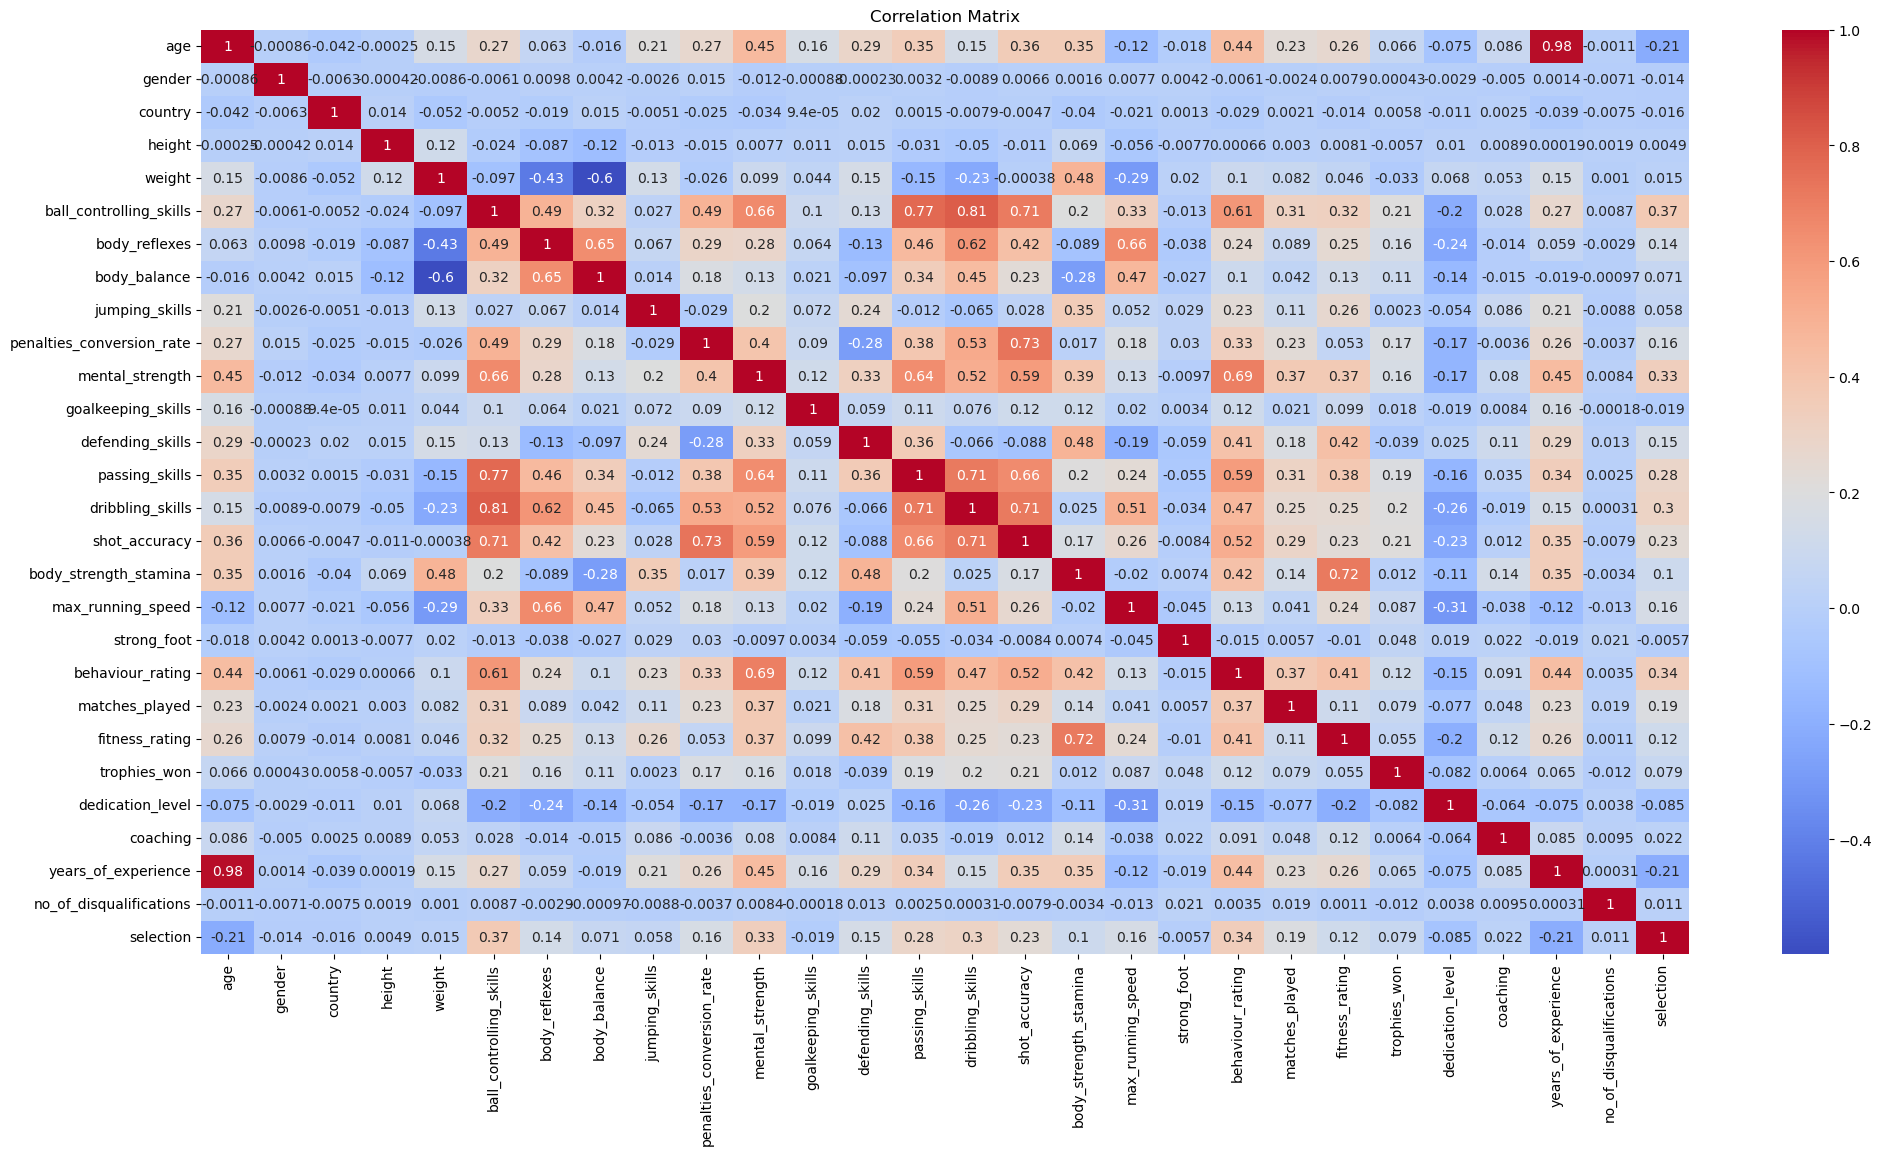

In [160]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# BUILDING CLASSIFICATION MODELS

# Defining the dependent and independent variables

In [172]:
x=data.drop(['selection'],axis=1)
y=data['selection']

In [173]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X=std_scaler.fit_transform(x)
X=pd.DataFrame(x)

In [174]:
#Splitting the data in such a way that 75% data is for training and 25% is for testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# LOGISTIC REGRESSION

# Model Training

In [175]:
#Defining and training(fitting) the logistic regression model using train data
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

In [176]:
#Predicting the output for the test data using the fitted model
lr_pred=lr_model.predict(x_test)

# Model Evaluation

In [177]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,lr_pred))

Confusion matrix : 
 [[ 633  262]
 [ 227 1036]]


In [178]:
#Evaluating the model using the metric accuracy score
lr_acc=accuracy_score(y_test,lr_pred)
print("Accuracy score :",lr_acc)

Accuracy score : 0.773401297497683


# K-NEAREST NEIGHBORS

In [179]:
from sklearn.neighbors import KNeighborsClassifier

#To choose the best value for K by finding the accuracy scores of the model for K values ranging from 3 to 14
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
print("Accuracy scores for K values ranging from 3 to 14 : \n",metric_k)

Accuracy scores for K values ranging from 3 to 14 : 
 [0.7233549582947173, 0.7080630213160334, 0.7228915662650602, 0.7228915662650602, 0.7391102873030584, 0.7479147358665431, 0.7493049119555144, 0.7455977757182577, 0.7455977757182577, 0.7469879518072289, 0.7534754402224282, 0.7451343836886005]


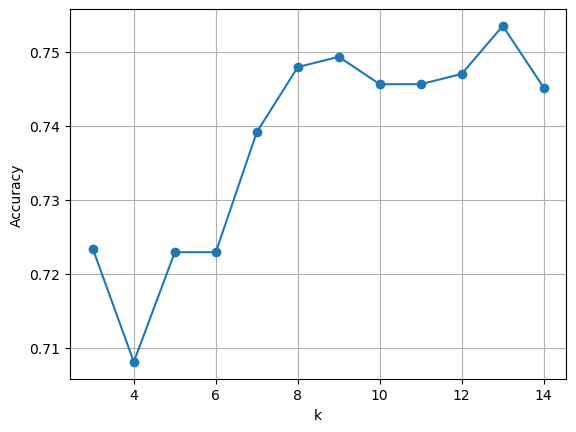

In [180]:
#Plotting the accuracy scores to find the best K value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()

k=13 has the highest accuracy.So we choose k to be 13

# Model Training

In [181]:
#Defining and training(fitting) the KNN model with K=4 using train data
classifier=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [182]:
#Predicting the output for the test data using the fitted model
y_pred=classifier.predict(x_test)

# Model Evaluation

In [183]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))

Confusion matrix : 
 [[ 600  295]
 [ 237 1026]]


In [184]:
#Evaluating the model using the metric accuracy score
knn_acc=accuracy_score(y_test,y_pred)
print("Accuracy score :",knn_acc)

Accuracy score : 0.7534754402224282


# SUPPORT VECTOR MACHINE( with Linear Kernel)

# Model Training

In [185]:
#Defining and training(fitting) the SVM model using train data
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)

In [186]:
#Predicting the output for the test data using the fitted model
y_pred_svm=svm_cls.predict(x_test)

# Model Evaluataion

In [187]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_svm))

Confusion matrix : 
 [[ 652  243]
 [ 233 1030]]


In [188]:
#Evaluating the model using the metric accuracy score
svm_acc=accuracy_score(y_test,y_pred_svm)
print("Accuracy score :",svm_acc)

Accuracy score : 0.7794253938832252


# DECISION TREE

# Model Training

In [189]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [190]:
#Predicting the output for the test data using the fitted model
y_pred_dt=dt_model.predict(x_test)

# Model Evaluation

In [191]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_dt))

Confusion matrix : 
 [[ 659  236]
 [ 242 1021]]


In [192]:
#Evaluating the model using the metric accuracy score
dt_acc=accuracy_score(y_test,y_pred_dt)
print("Accuracy score :",dt_acc)

Accuracy score : 0.7784986098239111


# RANDOM FOREST

# Model Training

In [193]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)

In [194]:
#Predicting the output for the test data using the fitted model
y_pred_rf=model_rf.predict(x_test)

# Model Evaluation

In [195]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_rf))

Confusion matrix : 
 [[ 722  173]
 [ 154 1109]]


In [196]:
#Evaluating the model using the metric accuracy score
rf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy score :",rf_acc)

Accuracy score : 0.8484708063021316


# Comparing the performance of all the models

In [197]:
#Creating a dataframe for model and accuracy(in percentage) and sorting it in descending order of accuracy
results=pd.DataFrame({'Model':['Logisic Regression','K-Nearest Neighbor','SVM(Linear)','Decision Tree','Random Forest'],
                      'Accuracy Score':[lr_acc,knn_acc,svm_acc,dt_acc,rf_acc]})
results=results.sort_values(by='Accuracy Score',ascending=False)
results=results.set_index('Model')
results

,Accuracy Score
Model,
Random Forest,0.848471
SVM(Linear),0.779425
Decision Tree,0.778499
Logisic Regression,0.773401
K-Nearest Neighbor,0.753475


Random forest classifier has the best accuracy score

# Cross Validation

In [199]:
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits = 20)
for train_index,test_index in sk.split(X,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [  533   538   540 ... 10784 10785 10786]
Test Index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229

In [202]:
#Finding stratified k-fold cross validation scores of random forest model
from sklearn.model_selection import cross_val_score
rf_skcv_result = cross_val_score(rf_cls,X,y,cv=sk)
print("Cross validation scores :\n",rf_skcv_result)

Cross validation scores :
 [0.84259259 0.85925926 0.85       0.87592593 0.86481481 0.86111111
 0.83148148 0.89053803 0.85714286 0.84786642 0.87755102 0.83858998
 0.86641929 0.84786642 0.84601113 0.8812616  0.86270872 0.8812616
 0.85343228 0.84601113]


In [205]:
#Finding average accuracy score of kNN model using stratified k-fold cross validation technique
print("Average accuracy score of Random Forest Classifier:",np.mean(rf_skcv_result))

Average accuracy score of Random Forest Classifier: 0.8590922833779977
